### Logistic Regression

In [2]:
dataset_url = "https://drive.google.com/u/1/uc?id=1X7-HGxDHR54J60vdrwekaML-blIHQjBi&export=download"
import pandas as pd
df = pd.read_csv(dataset_url)

In [4]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# We want to predict survival

#### Data profiling and Inspection

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
df.shape

(891, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* total number of rows 891
* total number of columns 12
* Age has 714 not null values remaining are null
* Cabin has 204 not null values remaining are null
* Embarked has 889 not null values remaining are null

In [13]:
import seaborn as sns

<Axes: >

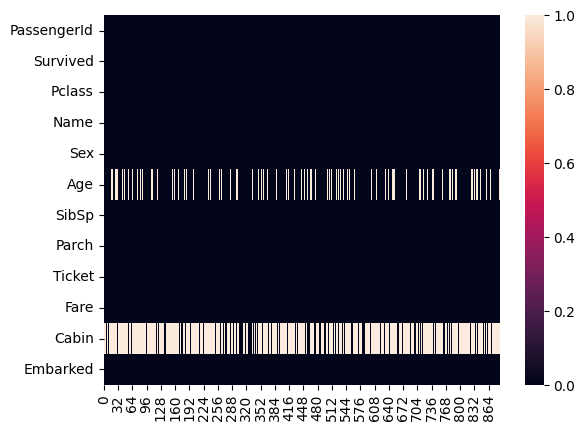

In [15]:
sns.heatmap(df.isnull().transpose())

In [16]:
df.isnull().sum()/len(df.isnull())

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

* Age contains almost 20% data missing
* Cabin contains almost 77% data missing
* Embarked contains 0.2% data missing

### EDA(Exploratory Data Analysis)

In [19]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Distribution of target or label Survived column

<Axes: xlabel='Survived', ylabel='count'>

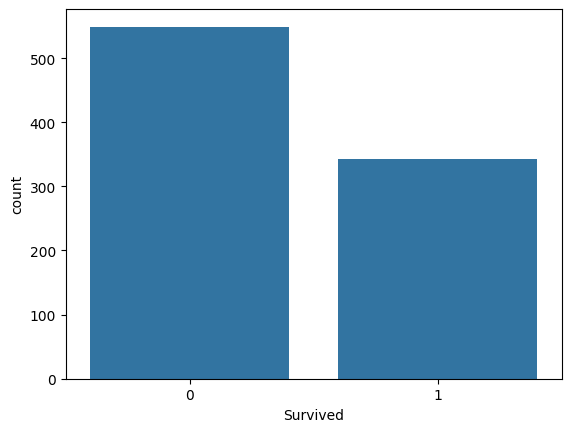

In [21]:
sns.countplot(x= "Survived", data=df)

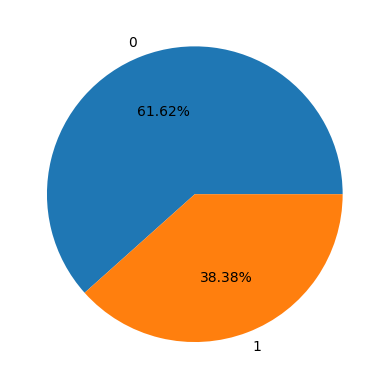

In [23]:
import matplotlib.pyplot as plt
s = df.Survived.value_counts()
plt.pie(s.values, labels=s.index, autopct="%.2f%%")
plt.show()

# It is imbalanced data, so accuracy metric might not be a good metric

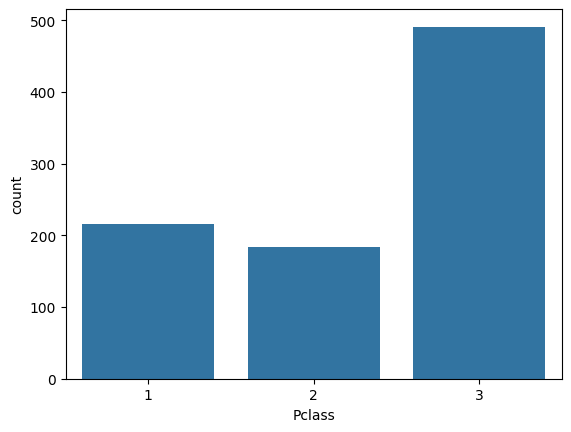

In [25]:
sns.countplot(x='Pclass', data=df)
plt.show()

### Most pessengers are in 3rd class

<Axes: xlabel='Age', ylabel='Count'>

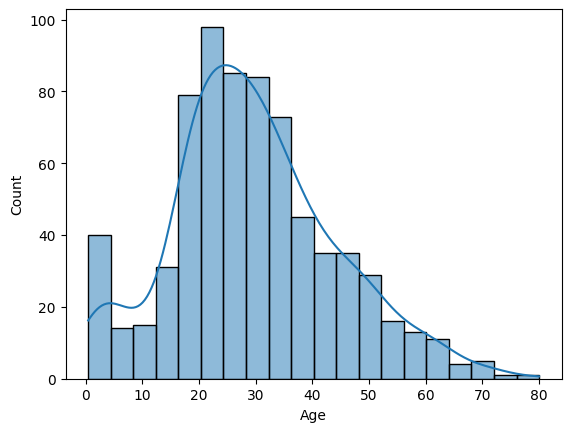

In [28]:
sns.histplot(df.Age, kde=True)

In [29]:
# explain

<Axes: ylabel='Age'>

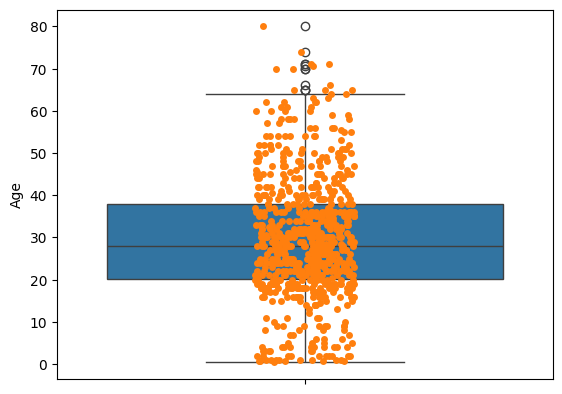

In [31]:
sns.boxplot(df.Age)
sns.stripplot(df.Age)

any

### Is there any relationship between survived and Pclass

<Axes: xlabel='Pclass', ylabel='count'>

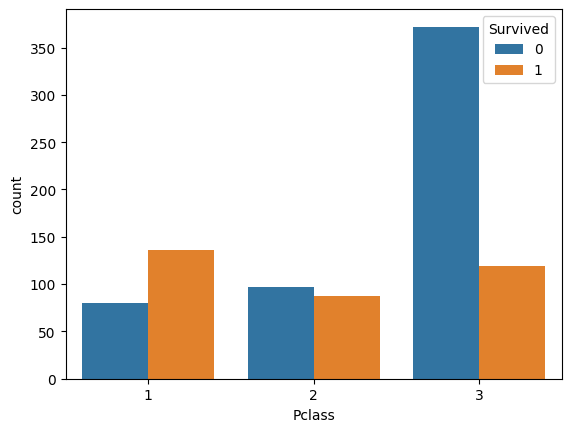

In [32]:
sns.countplot(x="Pclass",hue="Survived", data= df)

* In Pclass  1 most people survived compared to dead
* In Pclass 2 most people dies compared to survived

<Axes: xlabel='Sex', ylabel='count'>

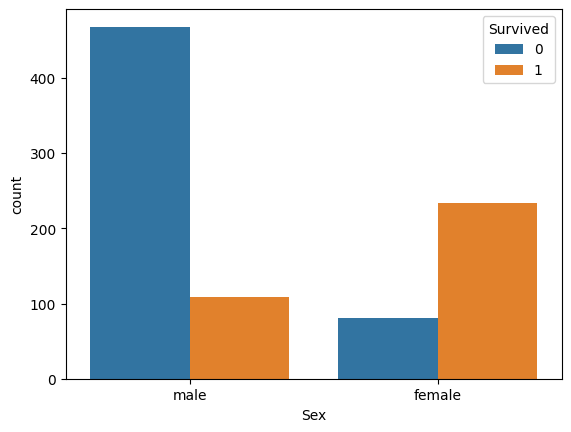

In [33]:
sns.countplot(x="Sex", hue="Survived", data=df)

* Most male died compared to survived
* Most female survived compared to died